In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

IMAGE_SHAPE = (224, 224)

# Define the data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\User\OneDrive\Desktop\EmoSense\Face Emotion Recognition\data_AN\train",
    target_size=IMAGE_SHAPE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\User\OneDrive\Desktop\EmoSense\Face Emotion Recognition\data_AN\val",
    target_size=IMAGE_SHAPE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 4925 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [2]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=IMAGE_SHAPE+(3,))
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [3]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50
)


Epoch 1/50


154/154 [==============================] - 655s 4s/step - loss: 1.7162 - accuracy: 0.3046 - val_loss: 1.6080 - val_accuracy: 0.3583
Epoch 2/50
154/154 [==============================] - 628s 4s/step - loss: 1.5747 - accuracy: 0.3649 - val_loss: 1.5382 - val_accuracy: 0.3833
Epoch 3/50
154/154 [==============================] - 620s 4s/step - loss: 1.5348 - accuracy: 0.3754 - val_loss: 1.5261 - val_accuracy: 0.4083
Epoch 4/50
154/154 [==============================] - 621s 4s/step - loss: 1.5186 - accuracy: 0.3915 - val_loss: 1.4895 - val_accuracy: 0.4083
Epoch 5/50
154/154 [==============================] - 620s 4s/step - loss: 1.4848 - accuracy: 0.4065 - val_loss: 1.4931 - val_accuracy: 0.4583
Epoch 6/50
154/154 [==============================] - 620s 4s/step - loss: 1.4671 - accuracy: 0.4160 - val_loss: 1.4802 - val_accuracy: 0.4250
Epoch 7/50
154/154 [==============================] - 614s 4s/step - loss: 1.4570 - accuracy: 0.4191 - val_loss: 1.5288 - val_accuracy: 0.39

In [4]:
# Unfreeze the top layers of the model
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_fine = model.fit( 
    train_generator,
    validation_data=validation_generator,
    epochs=50
)


Epoch 1/50
154/154 [==============================] - 852s 5s/step - loss: 1.5258 - accuracy: 0.3988 - val_loss: 1.4761 - val_accuracy: 0.4500
Epoch 2/50
154/154 [==============================] - 783s 5s/step - loss: 1.3950 - accuracy: 0.4497 - val_loss: 1.6386 - val_accuracy: 0.4083
Epoch 3/50
154/154 [==============================] - 844s 5s/step - loss: 1.3156 - accuracy: 0.4867 - val_loss: 1.5360 - val_accuracy: 0.4417
Epoch 4/50
154/154 [==============================] - 897s 6s/step - loss: 1.2685 - accuracy: 0.5027 - val_loss: 1.4554 - val_accuracy: 0.3833
Epoch 5/50
154/154 [==============================] - 821s 5s/step - loss: 1.2002 - accuracy: 0.5391 - val_loss: 1.4906 - val_accuracy: 0.3917
Epoch 6/50
154/154 [==============================] - 821s 5s/step - loss: 1.1630 - accuracy: 0.5535 - val_loss: 1.4537 - val_accuracy: 0.4167
Epoch 7/50
154/154 [==============================] - 811s 5s/step - loss: 1.1345 - accuracy: 0.5720 - val_loss: 1.4501 - val_accuracy: 0.4500

In [5]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


4/4 [==============================] - 9s 2s/step - loss: 1.6191 - accuracy: 0.4750
Validation Loss: 1.619081974029541
Validation Accuracy: 0.4749999940395355


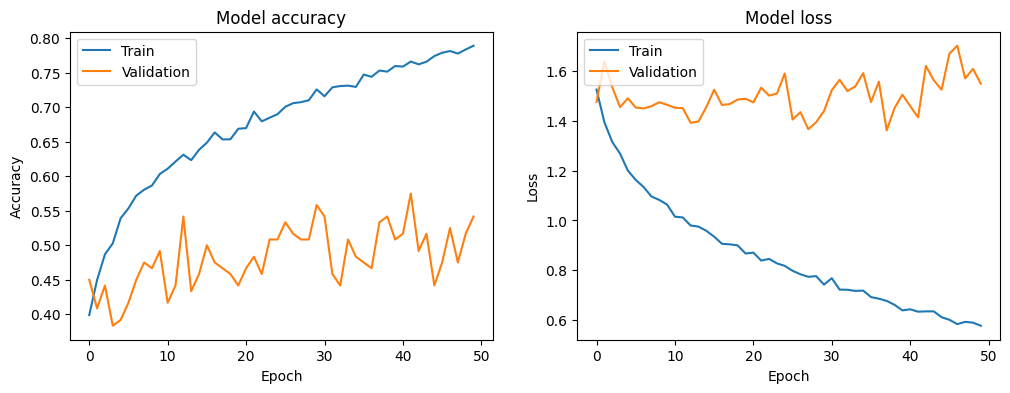

In [6]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

plot_history(history_fine)


In [7]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\User\OneDrive\Desktop\EmoSense\Face Emotion Recognition\data_AN\test",  # Replace with the path to your test images
    target_size=IMAGE_SHAPE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order for evaluation
)


Found 2400 images belonging to 6 classes.


In [8]:
import numpy as np
# Make predictions on the test set
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Extract the true labels from the test generator
y_test = test_generator.classes

# Calculate the accuracy using the custom function
def accuracy(A):
    count = 0
    y_t = y_test[0:A.size]  # Adjust range as necessary
    for i in range(A.size):
        if A[i] == y_t[i]:
            count += 1
    acc = (count / A.size) * 100
    return acc

acc = accuracy(predicted_classes)
print(f'Accuracy: {acc:.2f}%')


75/75 [==============================] - 168s 2s/step
Accuracy: 49.71%


In [9]:
# Assuming 'model' is your trained model
model.save('train3_AN.h5')  # You can use .h5 or no extension for SavedModel format


C:\Users\User\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
